In [1]:
from neurotask.tmt.tmt_analyzer import TMTAnalyzer

from src import config
from src.hand_analysis.mapper.psychopy_mapper import PsychopyTMTMapper

analyzer = TMTAnalyzer(
    mapper=PsychopyTMTMapper(),
    dataset_path=config.PYXATIONS_PATIENTS_DATA_DIR,
    output_path=config.DATA_DIR
)
#analysis = run_analysis_with_configuration_parameters(config.DATA_DIR)
experiment = analyzer.get_experiment()

In [2]:
subject = experiment.subjects["0063"]
subject

TMTSubject(training_trials=[], testing_trials=[TMTTrial(stimuli=[TMTTarget(content='1', position=Coordinate(x=-0.20191733333333317, y=-0.2820346666666667)), TMTTarget(content='2', position=Coordinate(x=-0.1183973333333332, y=-0.3655546666666667)), TMTTarget(content='3', position=Coordinate(x=-0.14623733333333336, y=-0.1706746666666666)), TMTTarget(content='4', position=Coordinate(x=-0.25759733333333334, y=-0.11499466666666662)), TMTTarget(content='5', position=Coordinate(x=-0.007037333333333234, y=-0.1706746666666666)), TMTTarget(content='6', position=Coordinate(x=0.16000266666666654, y=-0.11499466666666662)), TMTTarget(content='7', position=Coordinate(x=0.2435226666666667, y=0.13556533333333332)), TMTTarget(content='8', position=Coordinate(x=0.38272266666666666, y=0.24692533333333327)), TMTTarget(content='9', position=Coordinate(x=0.2713626666666667, y=-0.059314666666666634)), TMTTarget(content='10', position=Coordinate(x=0.41056266666666663, y=0.1634053333333333)), TMTTarget(content=

In [3]:
from src.hand_analysis.loader.load_last_split import load_last_analysis

train_set, _ = load_last_analysis()
subject_analysis = train_set[train_set['subject_id'] == 63]
subject_analysis['speed_threshold']

1160    0.204387
1161    0.204387
1162    0.204387
1163    0.204387
1164    0.204387
1165    0.204387
1166    0.204387
1167    0.204387
1168    0.204387
1169    0.204387
1170    0.204387
1171    0.204387
1172    0.204387
1173    0.204387
1174    0.204387
1175    0.204387
1176    0.204387
1177    0.204387
1178    0.204387
1179    0.204387
Name: speed_threshold, dtype: float64

Trial ID: 7
Trial Type: TrialType.PART_A
Trial order: 2
Speed Threshold: 0.2043872724277266


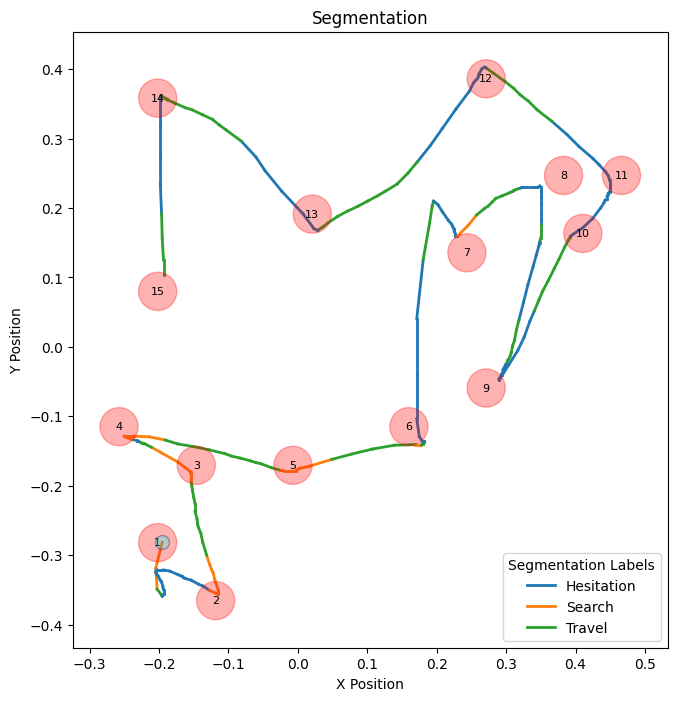

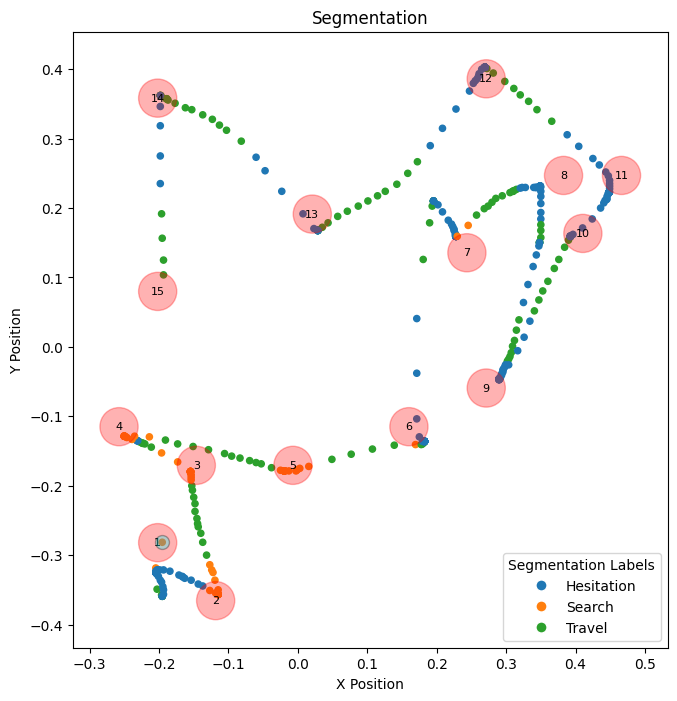

Trial ID: 12
Trial Type: TrialType.PART_B
Trial order: 3
Speed Threshold: 0.2043872724277266


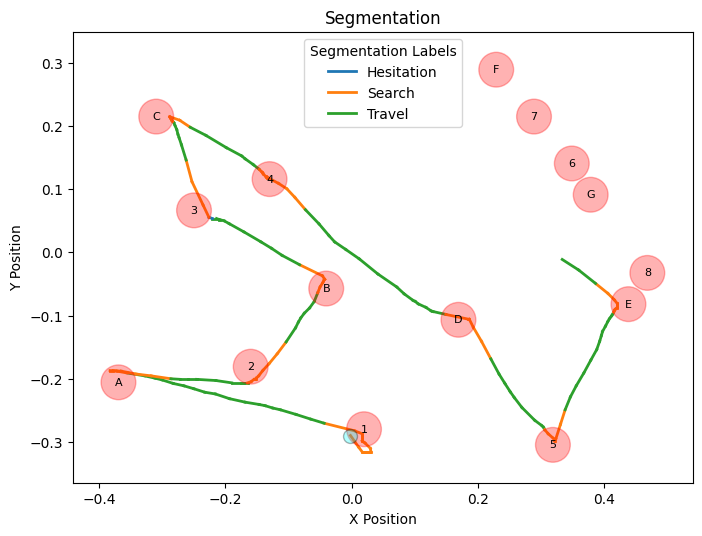

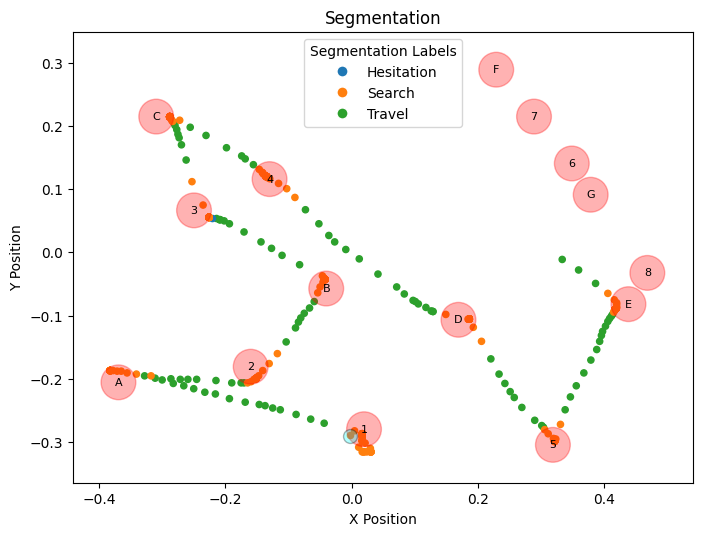

Trial ID: 1
Trial Type: TrialType.PART_A
Trial order: 4
Speed Threshold: 0.2043872724277266


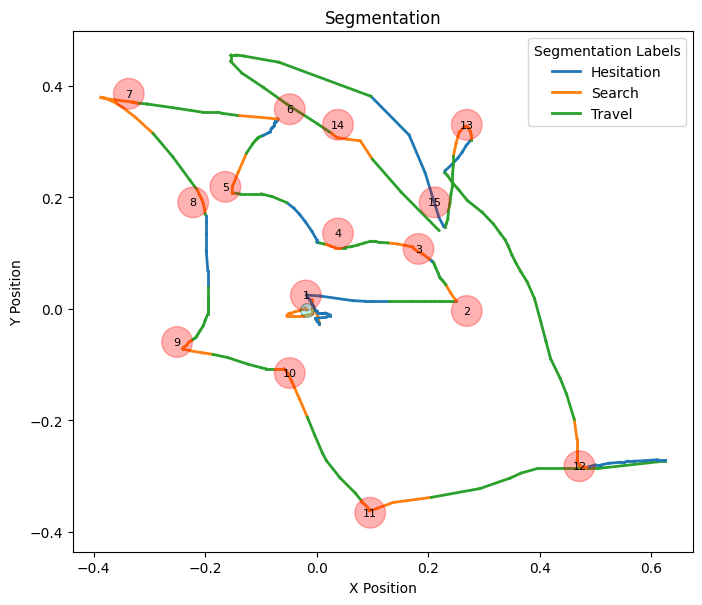

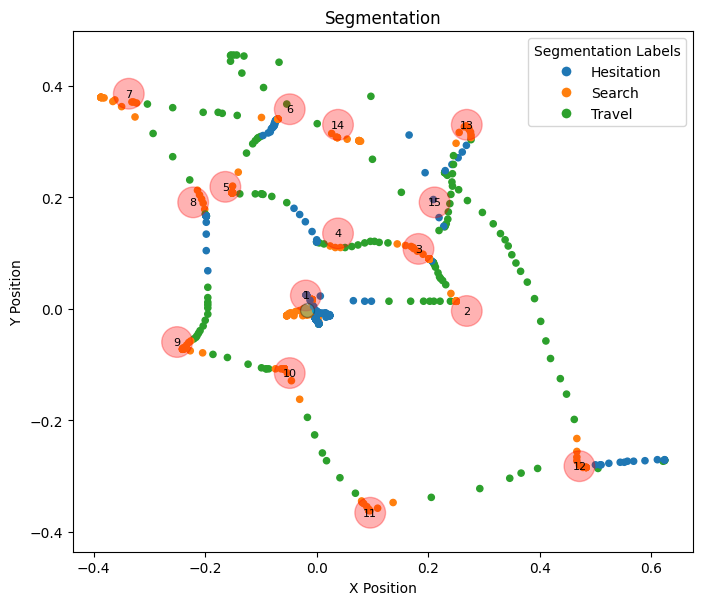

Trial ID: 20
Trial Type: TrialType.PART_B
Trial order: 5
Speed Threshold: 0.2043872724277266


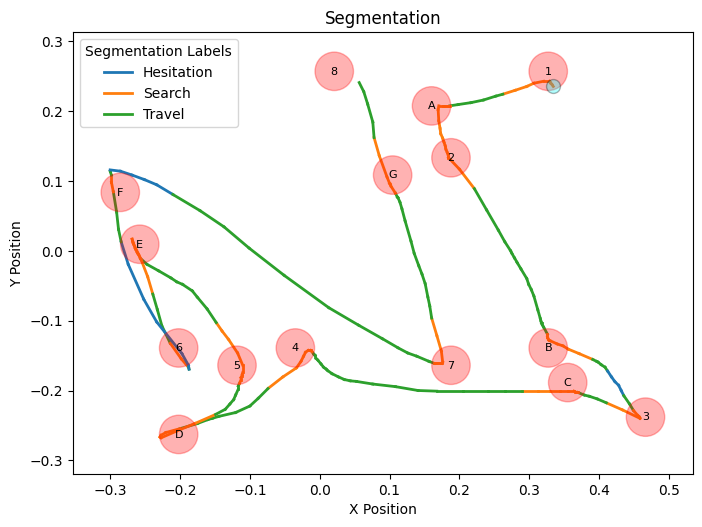

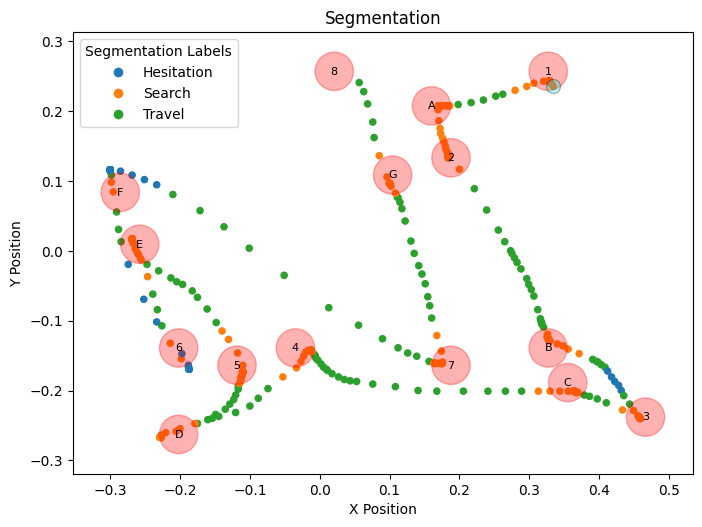

Trial ID: 11
Trial Type: TrialType.PART_A
Trial order: 6
Speed Threshold: 0.2043872724277266


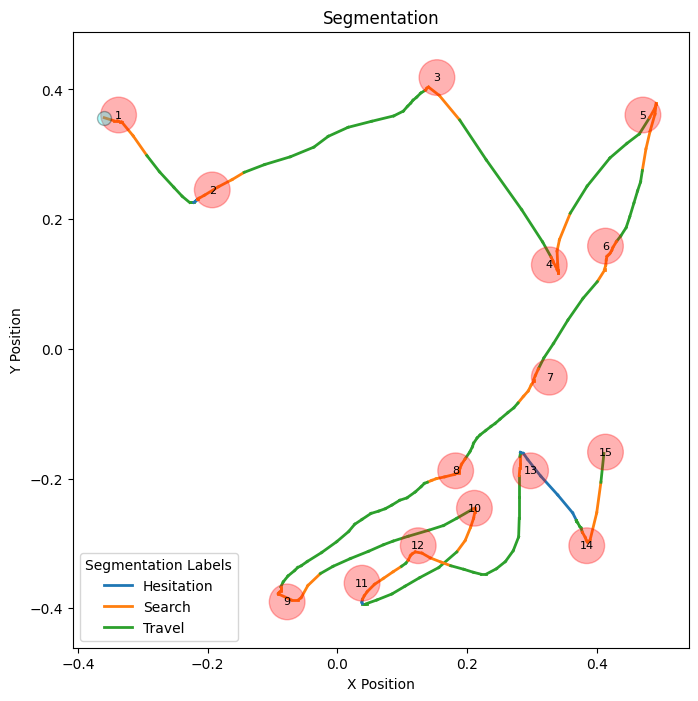

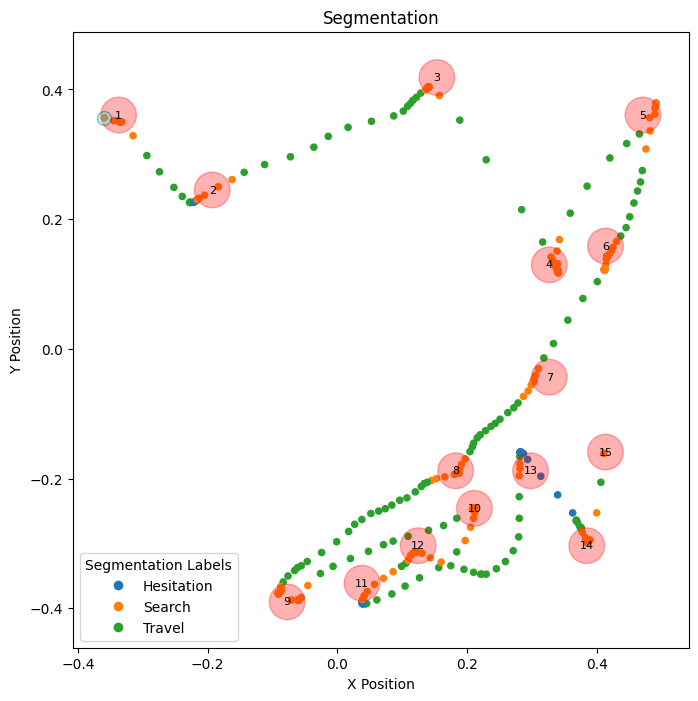

Trial ID: 13
Trial Type: TrialType.PART_B
Trial order: 7
Speed Threshold: 0.2043872724277266


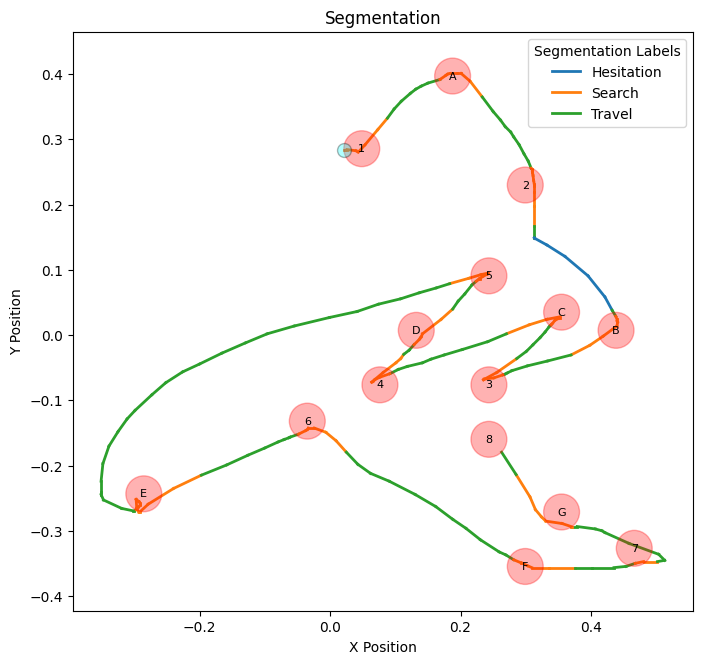

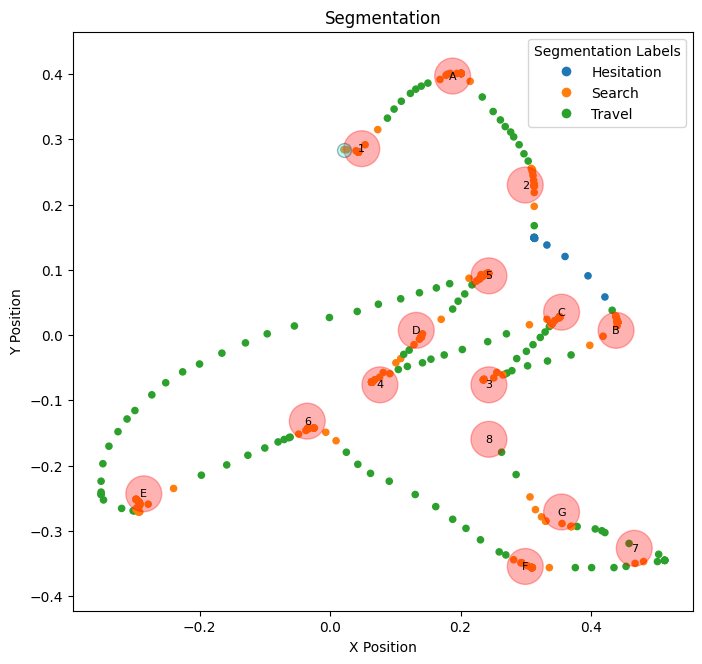

Trial ID: 17
Trial Type: TrialType.PART_A
Trial order: 8
Speed Threshold: 0.2043872724277266


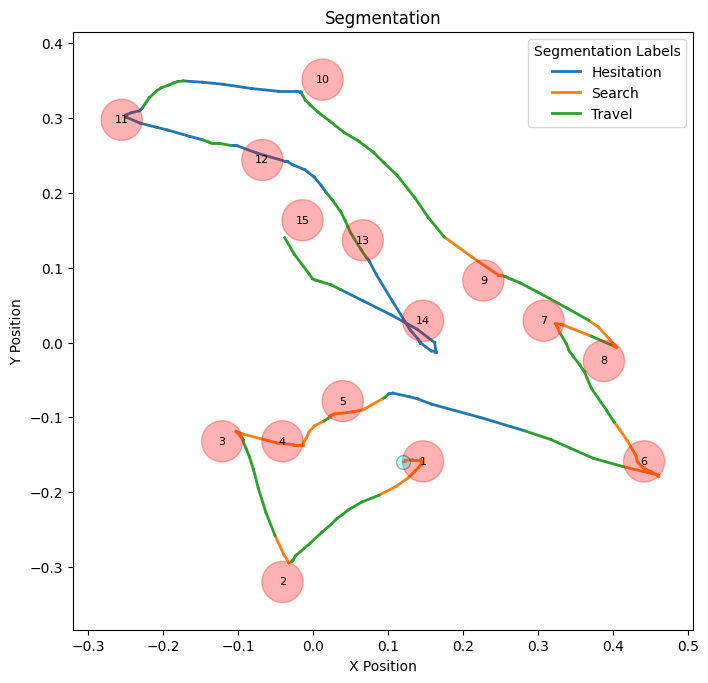

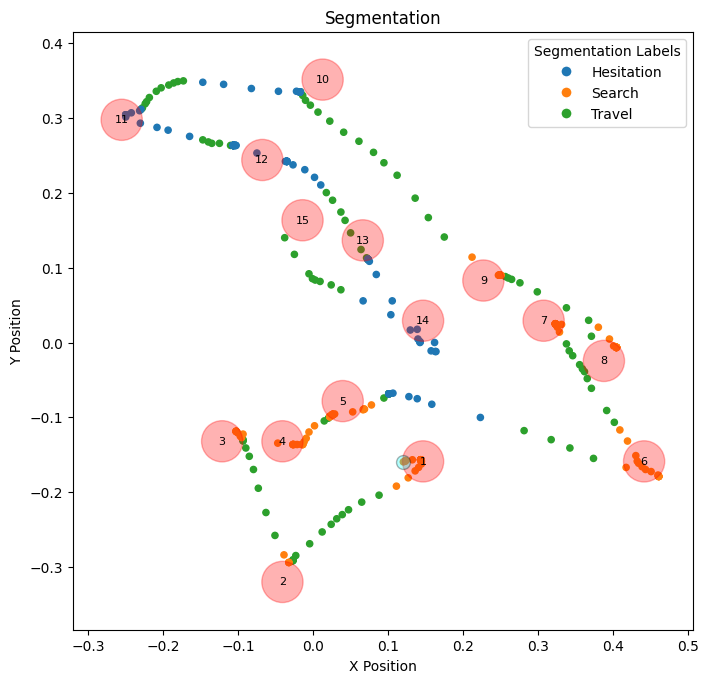

Trial ID: 0
Trial Type: TrialType.PART_B
Trial order: 9
Speed Threshold: 0.2043872724277266


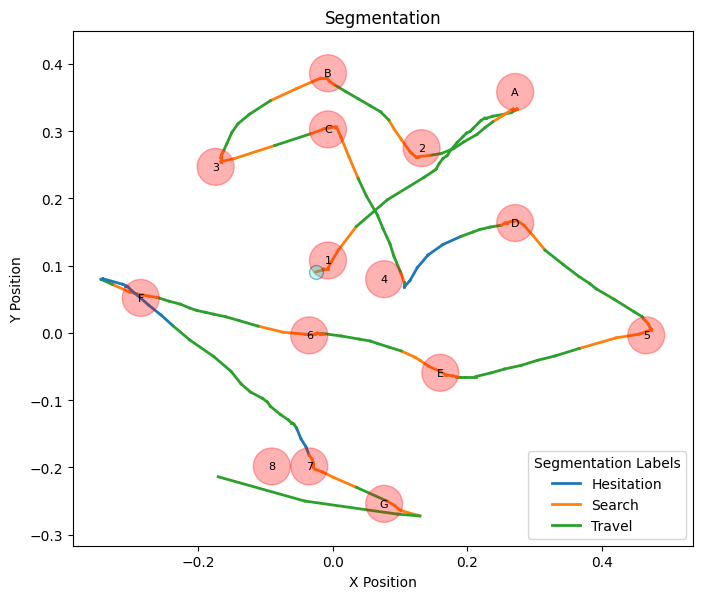

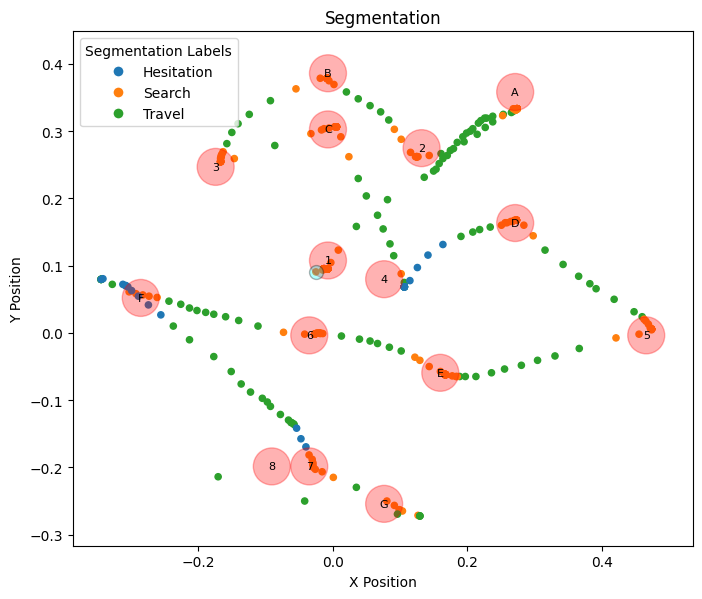

Trial ID: 5
Trial Type: TrialType.PART_A
Trial order: 10
Speed Threshold: 0.2043872724277266


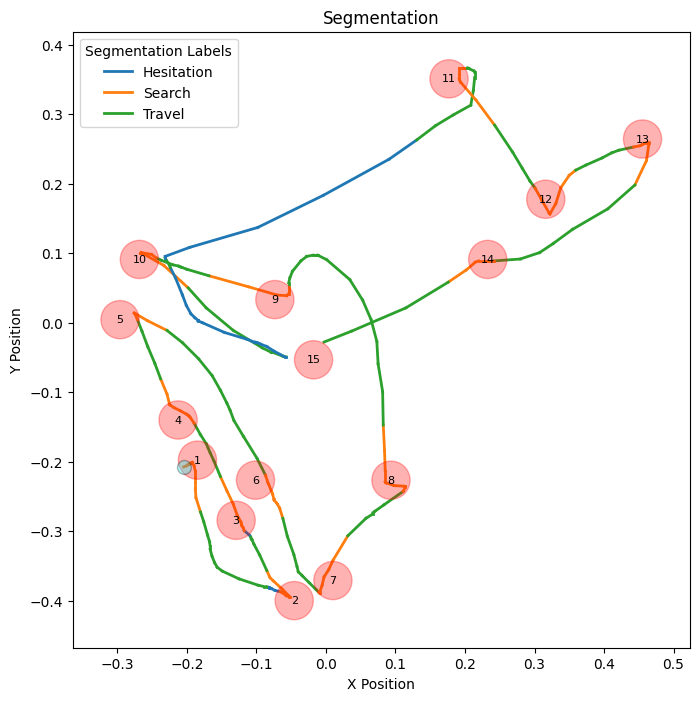

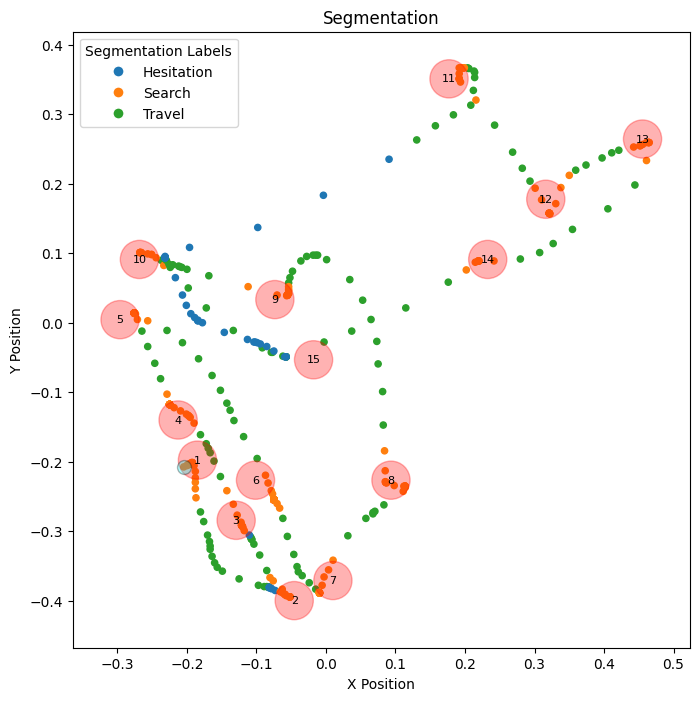

Trial ID: 10
Trial Type: TrialType.PART_B
Trial order: 11
Speed Threshold: 0.2043872724277266


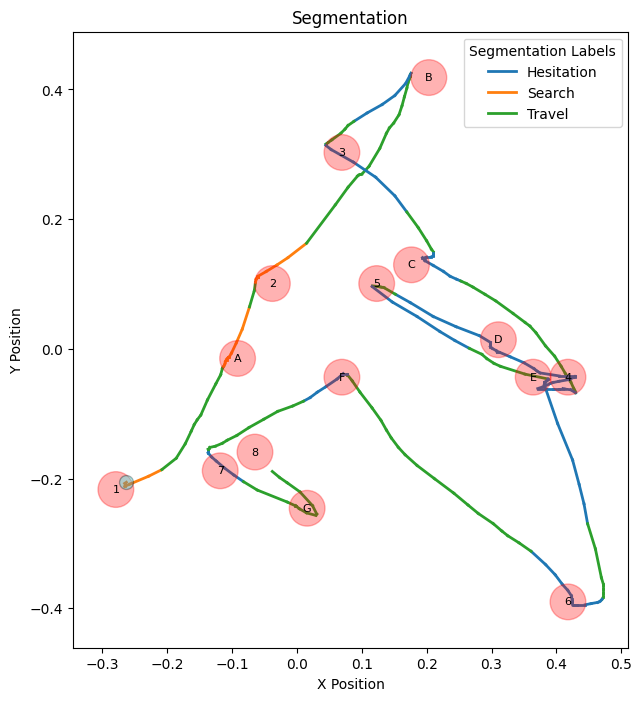

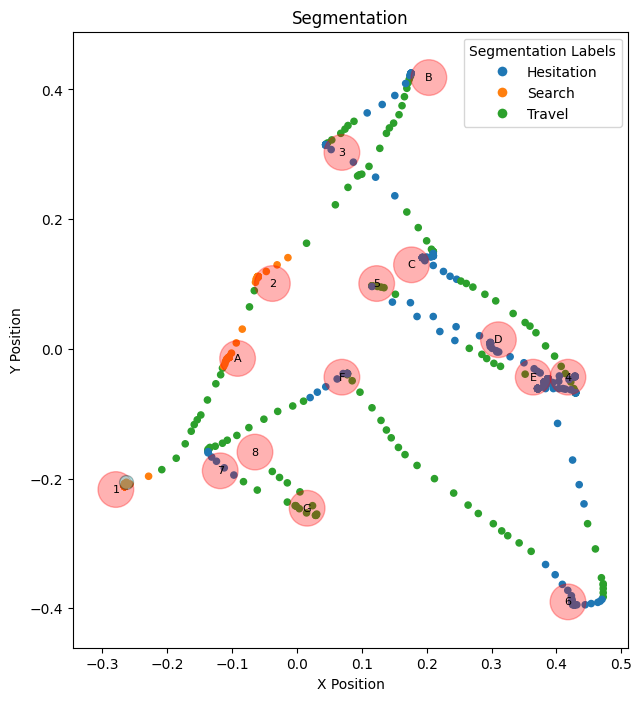

Trial ID: 9
Trial Type: TrialType.PART_A
Trial order: 12
Speed Threshold: 0.2043872724277266


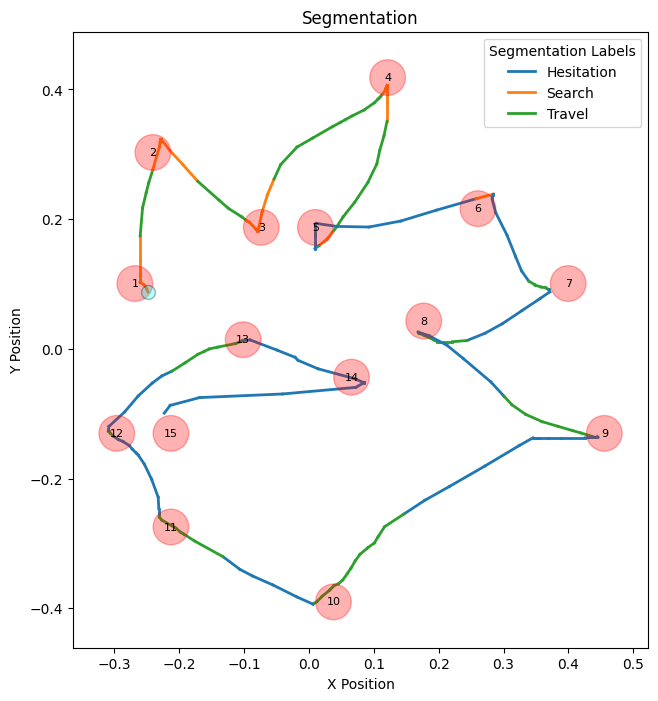

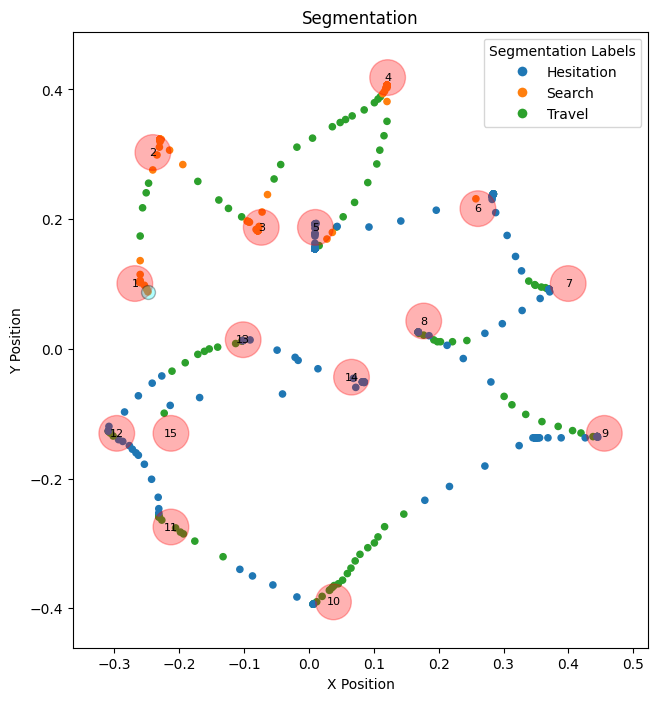

Trial ID: 16
Trial Type: TrialType.PART_B
Trial order: 13
Speed Threshold: 0.2043872724277266


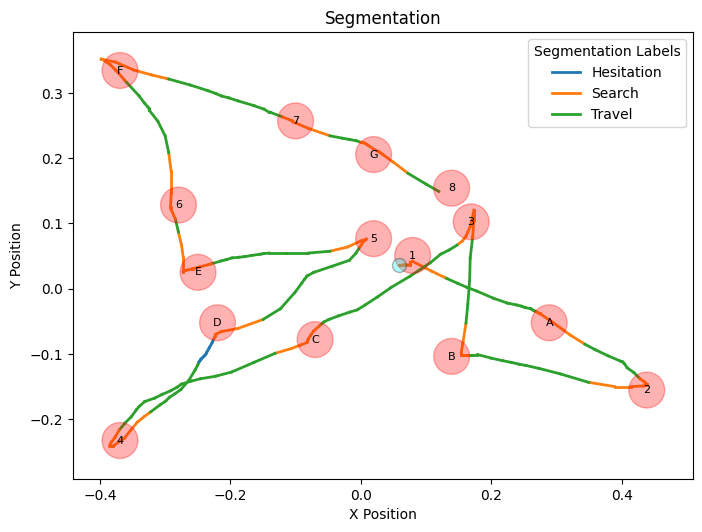

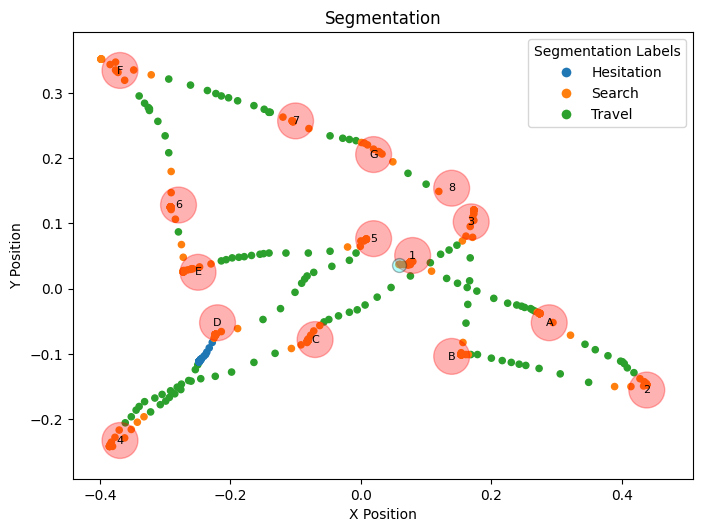

Trial ID: 15
Trial Type: TrialType.PART_A
Trial order: 14
Speed Threshold: 0.2043872724277266


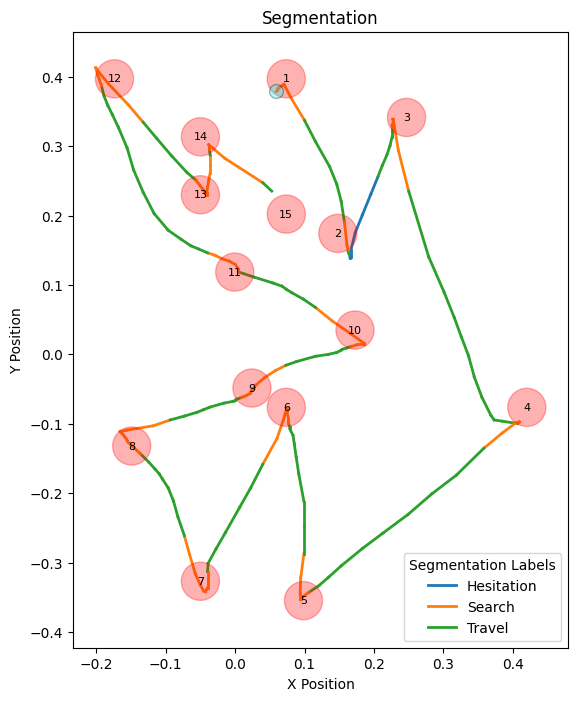

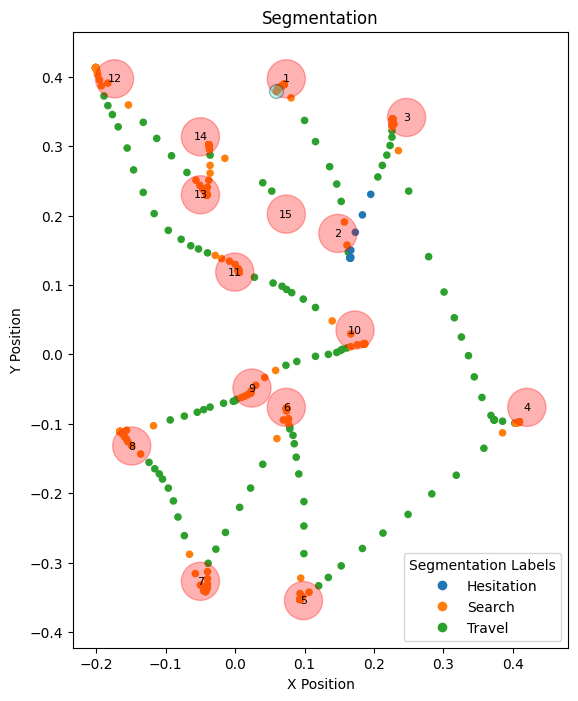

Trial ID: 2
Trial Type: TrialType.PART_B
Trial order: 15
Speed Threshold: 0.2043872724277266


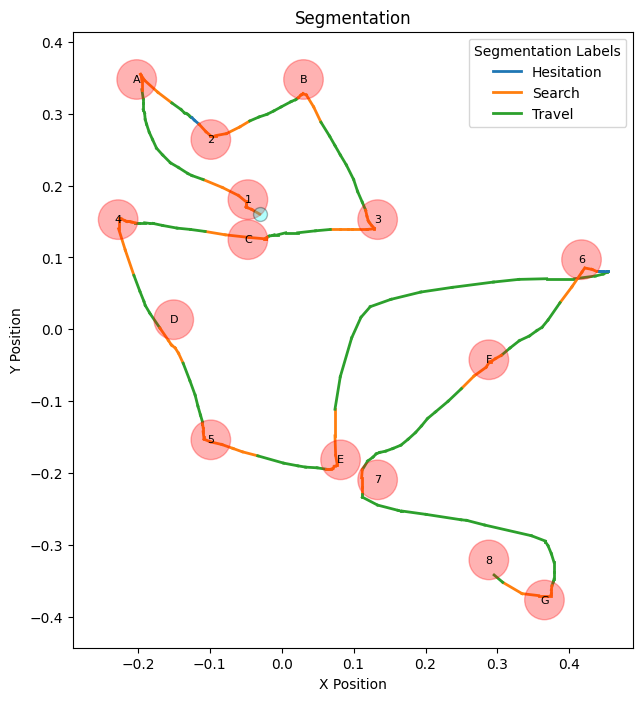

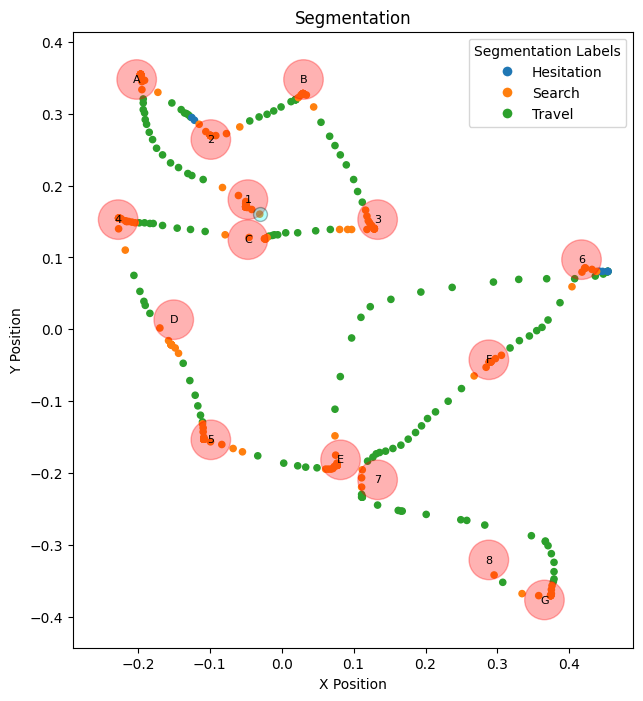

Trial ID: 3
Trial Type: TrialType.PART_A
Trial order: 16
Speed Threshold: 0.2043872724277266


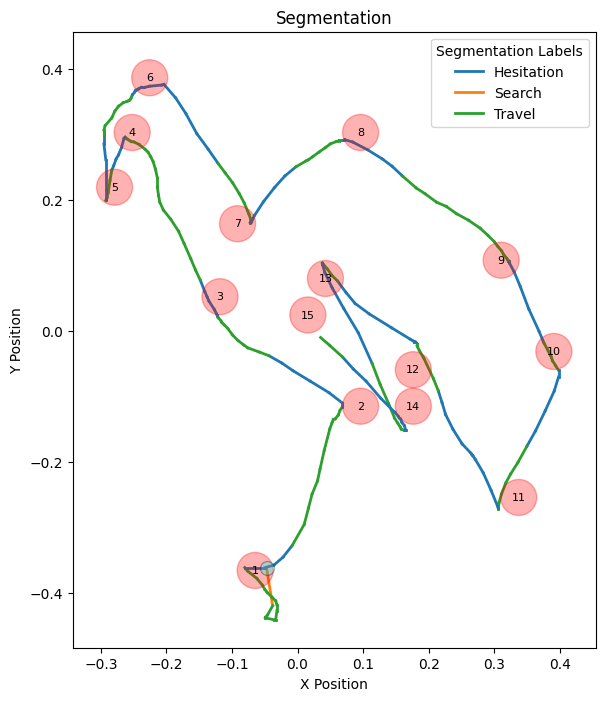

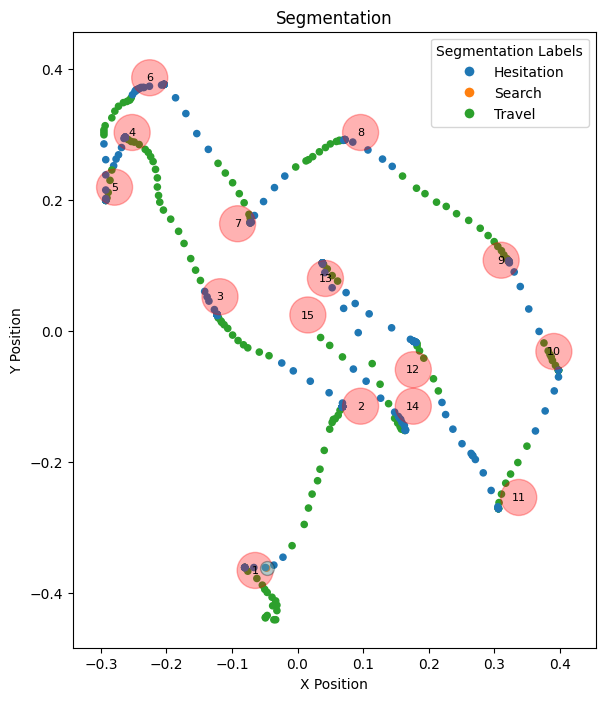

Trial ID: 8
Trial Type: TrialType.PART_B
Trial order: 17
Speed Threshold: 0.2043872724277266


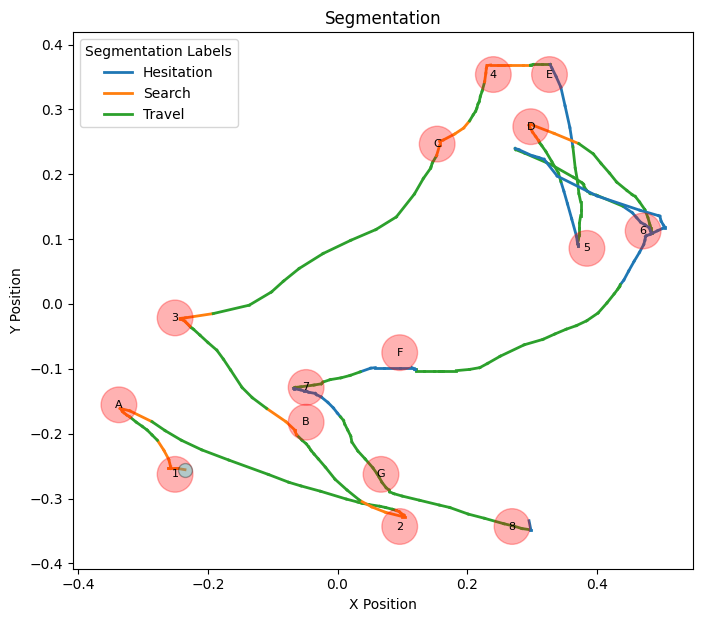

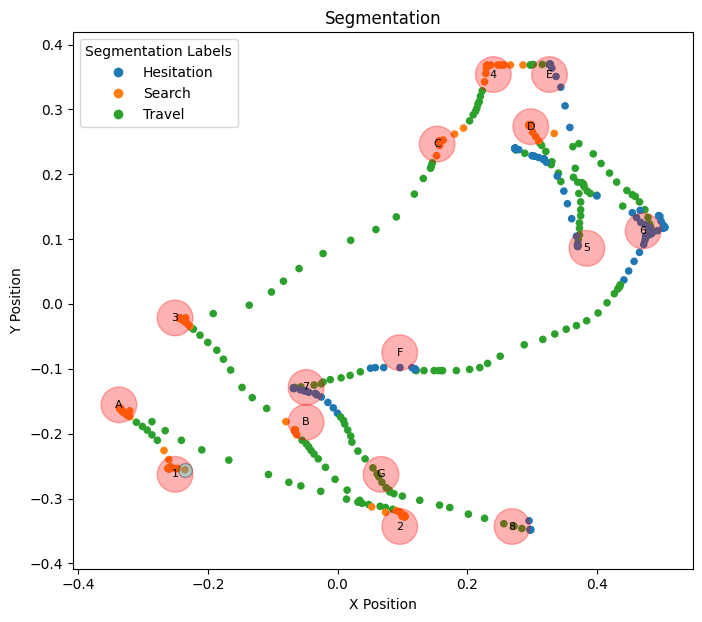

Trial ID: 6
Trial Type: TrialType.PART_A
Trial order: 18
Speed Threshold: 0.2043872724277266


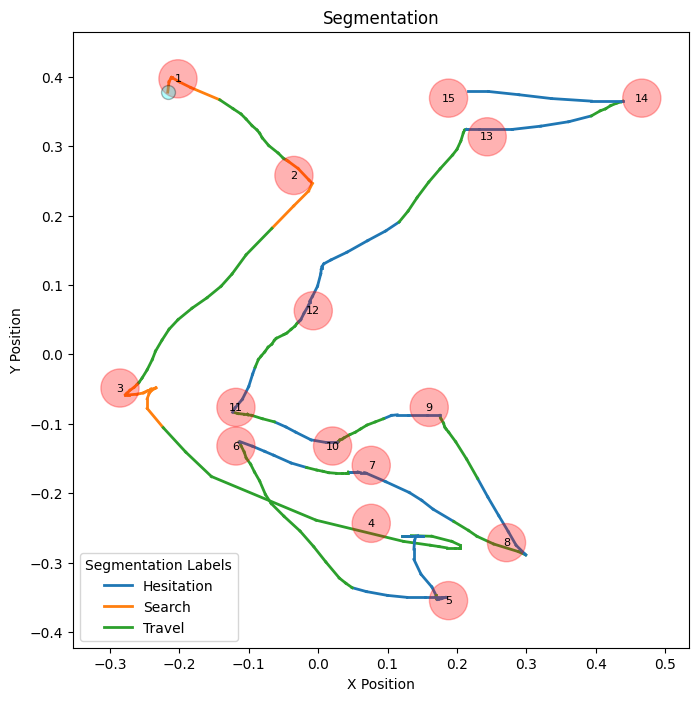

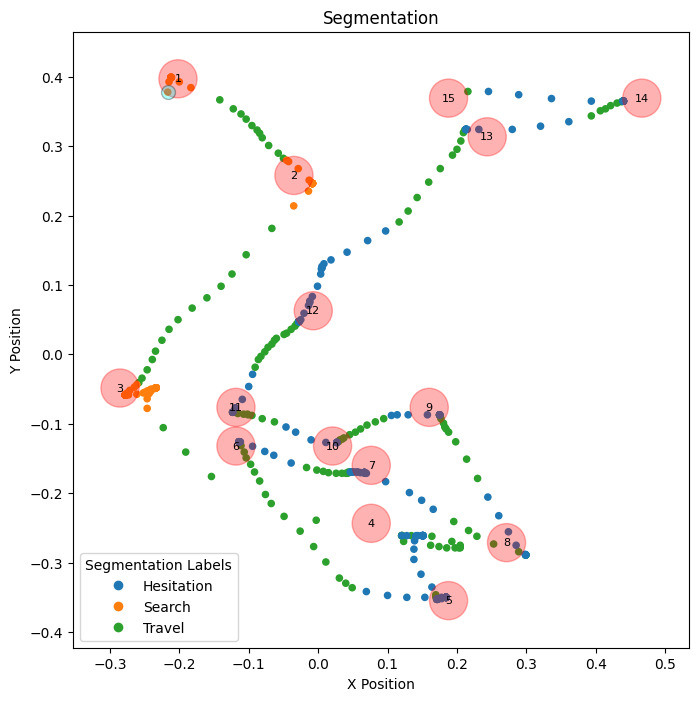

Trial ID: 4
Trial Type: TrialType.PART_B
Trial order: 19
Speed Threshold: 0.2043872724277266


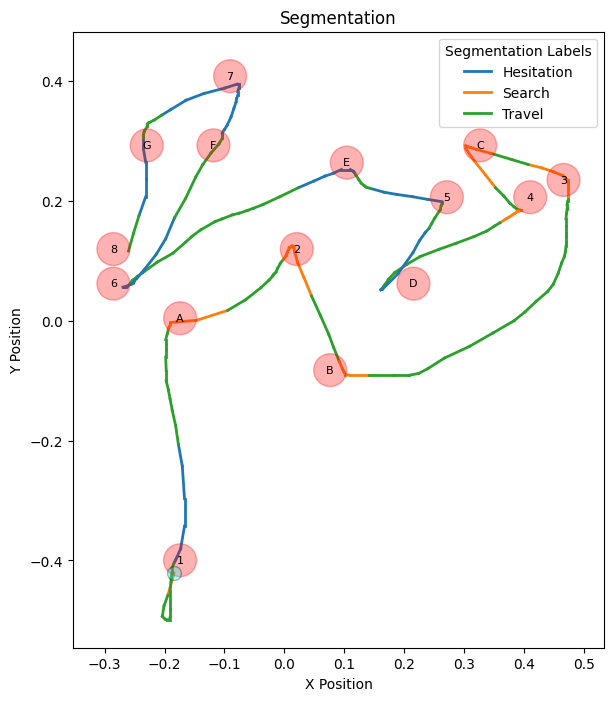

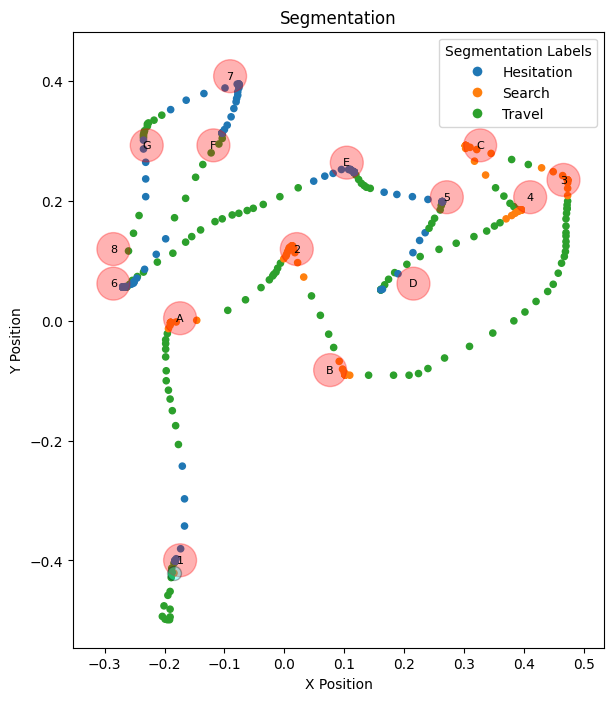

Trial ID: 19
Trial Type: TrialType.PART_A
Trial order: 20
Speed Threshold: 0.2043872724277266


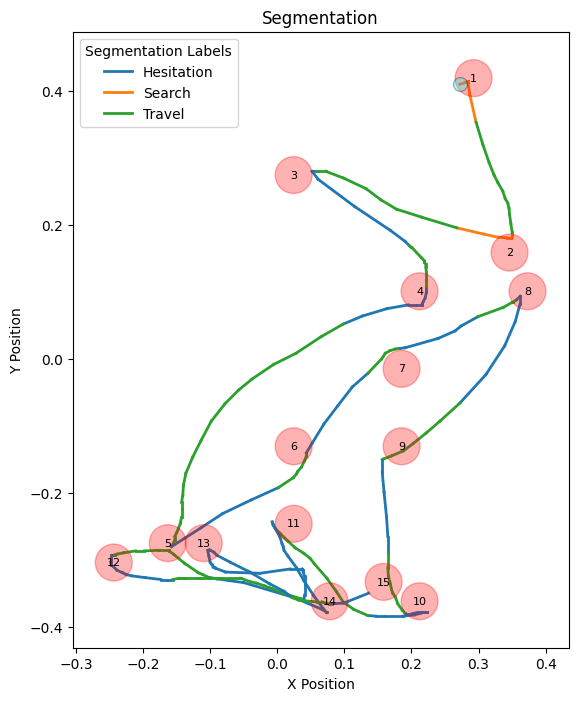

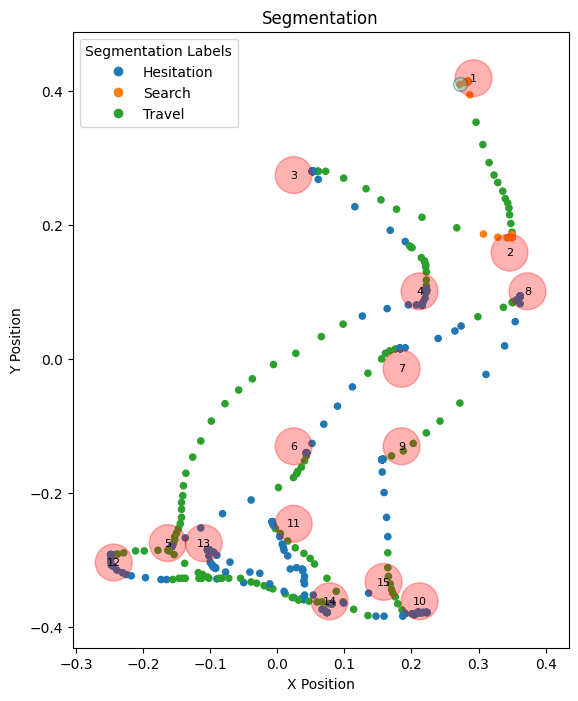

Trial ID: 21
Trial Type: TrialType.PART_B
Trial order: 21
Speed Threshold: 0.2043872724277266


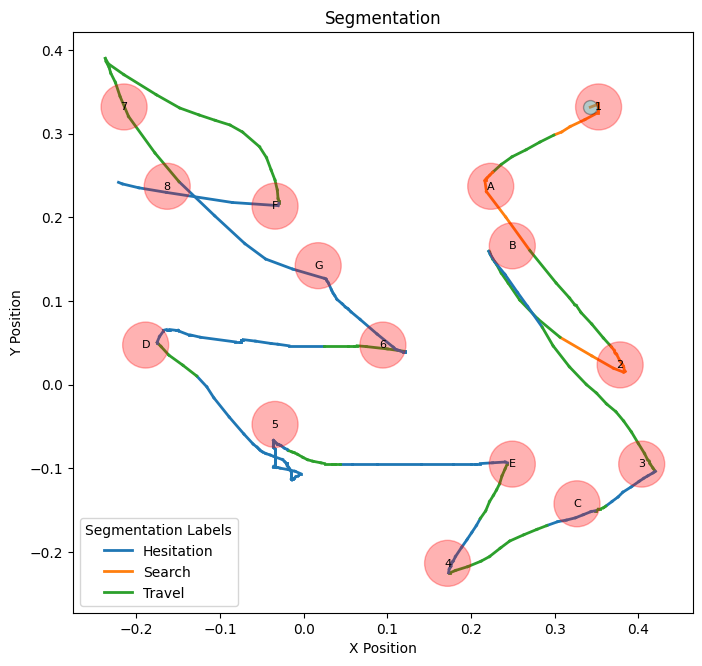

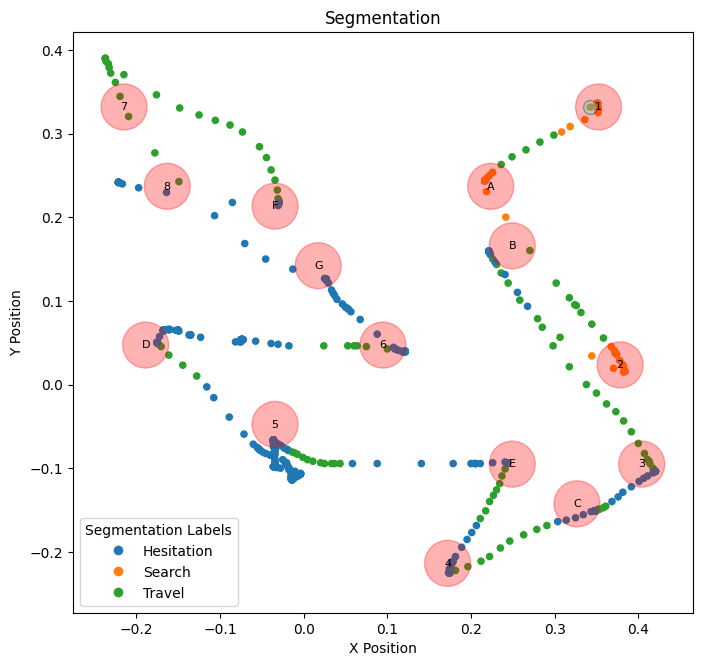

-----------------------------------------------



In [4]:
from src.visualization.segmentation_plotting import plot_segmentation
from neurotask.tmt.segmentation.segmentation import classify_cursor_positions_with_hesitation
from neurotask.tmt.metrics.targets_touched import *

for trial in subject.testing_trials:
    print("Trial ID:", trial.id)
    print("Trial Type:", trial.trial_type)
    print("Trial order:", trial.order_of_appearance)

    trial_analysis = subject_analysis[subject_analysis['trial_id'] == trial.id]
    speed_threshold = trial_analysis['speed_threshold'].values[0]
    print("Speed Threshold:", speed_threshold)
    segmentation: List[Tuple[str, CursorInfo]] = classify_cursor_positions_with_hesitation(trial,
                                                                                           subject.target_radius,
                                                                                           speed_threshold)
    segmentation_labels = [label for (label, color) in segmentation]

    plot_segmentation(trial, subject.target_radius, speed_threshold)

print("-----------------------------------------------")
print("")